In [1]:
#导入包
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#周期序列
Q =np.array([0.9,0.5,0.4,0.8,0.9,0.5,0.4,0.8,0.9,0.5,0.4,0.8,0.9])
Q2=np.array([0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18])

In [3]:
#getHVGPoint函数：输入序列Q，返回需要连接的两点坐标的集合
def getHVGPoint(Q):
    #坐标
    x=np.array(range(1,len(Q)+1))
    y=np.array(Q)

    #准备序列a,b，将相连的两点的x坐标分别记录在a,b序列中
    a=[]
    b=[]

    #遍历,获得连接两点的横坐标
    #控制ta移动
    for ta in range(0,len(x)-1):
        #控制tb移动
        for tb in range(ta+1,len(x)):
            ta=ta
            ya=y[ta]
            tb=tb
            yb=y[tb]
            #tc在ta,tb之间
            tc=np.array(range(ta+1,tb))
            yc=y[(ta+1):tb]
            #如果相邻，或者值1大于值2，则记录下来
            #并打印相连的两点的坐标用(ta,tb)表示
            if tb-ta==1 or min(np.array([ya,yb]))>max(yc) :
                a.append(ta)
                b.append(tb)
                #print('(',ta,',',tb,')')
    arr=[a,b]
    return arr

In [4]:
#getLPHVGPoint函数：输入序列Q、有限可视距N，返回LPVG图新增的两点坐标的集合
def getLPHVGPoint(Q,N):
    #坐标
    x=np.array(range(1,len(Q)+1))
    y=np.array(Q)

    #准备序列a,b，将相连的两点的x坐标分别记录在a,b序列中
    a=[]
    b=[]

    #遍历,获得连接两点的横坐标
    #控制ta移动
    for ta in range(0,len(x)-1):
        #控制tb移动
        for tb in range(ta+1,len(x)):
            n=0
            ta=ta
            ya=y[ta]
            tb=tb
            yb=y[tb]
            #tc在ta,tb之间
            tc=np.array(range(ta+1,tb))
            yc=y[(ta+1):tb]
            #计算n的值
            n=sum(yc>=min(np.array([ya,yb])))
            #如果0<n<=N,则添加两点
            if n>0 and n<=N:
                a.append(ta)
                b.append(tb)
                #print('(',ta,',',tb,')')
    arr=[a,b]
    return arr

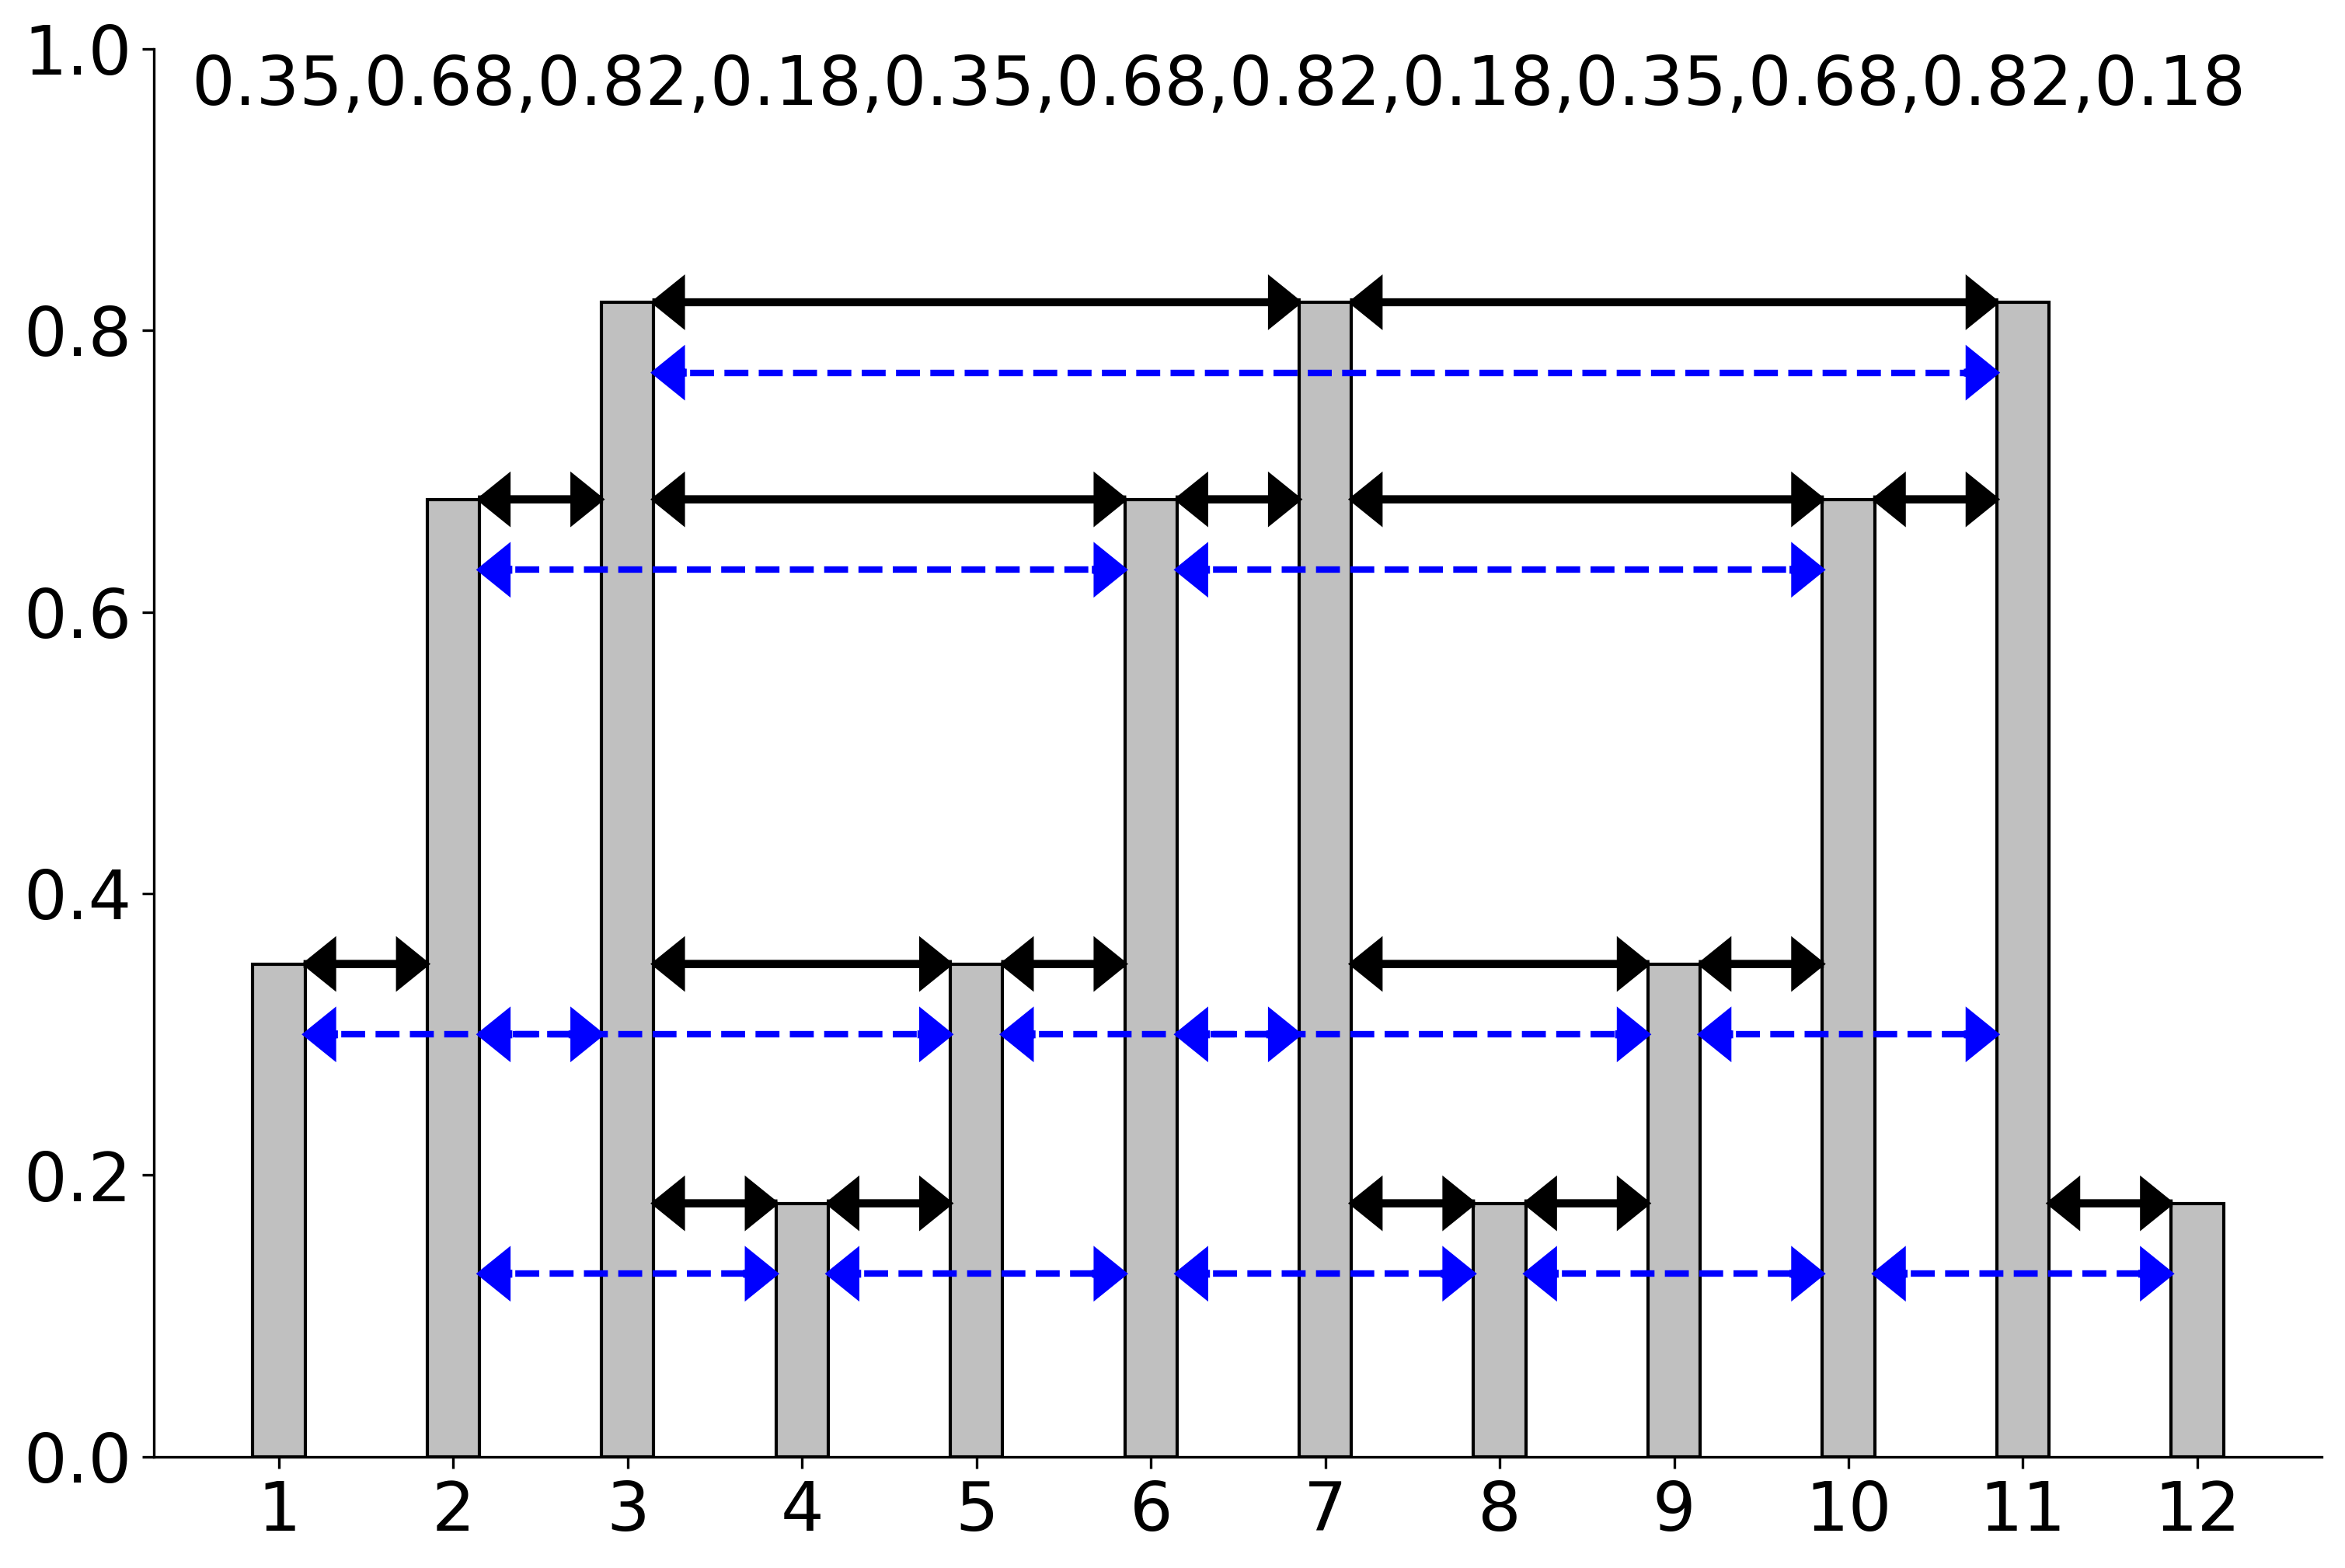

In [5]:
#LPVG_bar函数：输入序列Q，输出VG条形图（需先调用getVGPoint函数）
def LPHVG_bar(Q,N):
    #准备画布，和一个坐标轴
    fig = plt.figure(figsize=(12, 8), dpi=300)#设置图形大小
    ax = fig.add_subplot(111)
    
    #设置样式
    #ax.set_yticks(Q)#不显示y坐标轴标签
    plt.ylim(0,1)
    plt.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)#不显示上边框
    ax.spines['right'].set_visible(False)#不显示右边框
    
    #画条形图
    x= np.array(range(0,len(Q)))
    p1=ax.bar(x,Q,width=0.3,color='#C0C0C0',edgecolor='black',zorder=10)

    #获取要连接两点的坐标
    arr=getHVGPoint(Q)
    arr1=getLPHVGPoint(Q,N)
    
    #在图中连接HVG两点
    for i in range(0,len(arr[0])):
        p2=ax.arrow(arr[0][i]+0.16, min([Q[arr[0][i]],Q[arr[1][i]]]),arr[1][i]-0.16-(arr[0][i]+0.16),0,color='black',length_includes_head=True,head_width=0.03,head_length=0.15, linewidth=2,zorder=11)
        p2=ax.arrow(arr[1][i]-0.16, min([Q[arr[1][i]],Q[arr[0][i]]]),-arr[1][i]+0.16+(arr[0][i]+0.16),0,color='black',length_includes_head=True,head_width=0.03,head_length=0.15, linewidth=2,zorder=11)
        
    #在图中连接LPHVG两点
    for i in range(0,len(arr1[0])):
        #print(arr1[0][i]," ",arr1[1][i])
        p2=ax.plot([arr1[0][i]+0.16,arr1[1][i]-0.16],[(min([Q[arr1[0][i]],Q[arr1[1][i]]])-0.05),(min([Q[arr1[0][i]],Q[arr1[1][i]]])-0.05)],color='blue',linestyle="--",linewidth=2,zorder=30)
        p3=ax.arrow(arr1[1][i]-0.32, (min([Q[arr1[0][i]],Q[arr1[1][i]]])-0.05),0.16,0,color='blue',length_includes_head=True,head_width=0.03,head_length=0.15,linewidth=2,zorder=11)
        p3=ax.arrow(arr1[0][i]+0.32, (min([Q[arr1[0][i]],Q[arr1[1][i]]])-0.05),-0.16,0,color='blue',length_includes_head=True,head_width=0.03,head_length=0.15,linewidth=2,zorder=11)
        
    #设置x轴刻度的值（为直方条高度），调整字体大小
    plt.xticks(x,range(1, len(Q) + 1),fontsize=21)
    plt.yticks(fontsize=21)
    plt.text(-0.5, 0.96, "0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18", size=21,
         bbox=dict(boxstyle="square",
                  color="#FFFFFF"
                   )
         )
    #显示图像
    plt.rcParams['xtick.direction'] = 'in' #将x轴的刻度线方向设置向内
    plt.rcParams['ytick.direction'] = 'in' #将y轴的刻度方向设置向内
    
    #保存图片
    #plt.savefig('E:\\LPHVG_bar.png',bbox_inches="tight",dpi=600)
    
    #显示图像
    plt.show()
    
#调用
LPHVG_bar(Q2,1)


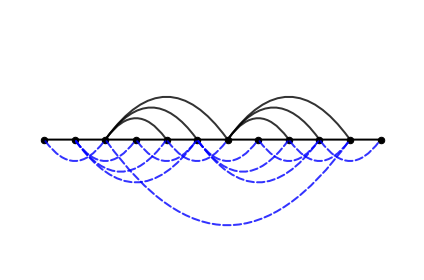

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
arr=getHVGPoint(Q2)
arr1=getLPHVGPoint(Q2,1)
x=np.array(range(0,len(Q2)))
G = nx.DiGraph()        # 无多重边无向图
G.add_nodes_from(x)  # 添加多个节点
for i in range(0,len(arr[0])):
    if arr[1][i]-arr[0][i]==1:
        G.add_edges_from([(arr[0][i],arr[1][i])],index=0)
    else:
        G.add_edges_from([(arr[0][i],arr[1][i])],index=0.6)
        
for i in range(0,len(arr1[0])):
#     if arr1[1][i]-arr1[0][i]==1:
#         G.add_edges_from([(arr1[0][i],arr1[1][i])],rad=0)
#     else:
        G.add_edges_from([(arr1[0][i],arr1[1][i])],index=0.9)        
pos=dict()
for i in range(12,-1,-1):
    sd={i:(i,0)}
    pos={**sd,**pos}
# print(edge)
ax = plt.gca()###重要，必需存在
nx.draw_networkx_nodes(G, pos, node_size=42, nodelist=x, node_color="black")
for edge in G.edges(data='index'):
    if edge[2]==0:
        rads=0
    else:
        rads=0.7
    if rads==0:
        arrowprops1=dict(arrowstyle="-",
                    color='black',
                    connectionstyle=f"arc3,rad={rads}",
                    linestyle= '-',
                    linewidth=2,
                    alpha=1,)
        ax.annotate("", xy=[edge[1],0], xytext=[edge[0],0],arrowprops=arrowprops1)
    elif edge[2]==0.6:
        arrowprops3=dict(arrowstyle="-",
                    color='black',
                    connectionstyle=f"arc3,rad={-rads}",
                    linestyle= '-',
                    linewidth=2,
                    alpha=0.8,)
        ax.annotate("", xy=[edge[1],0], xytext=[edge[0],0],arrowprops=arrowprops3)
       
    else:
        arrowprops3=dict(arrowstyle="-",
                    color='blue',
                    connectionstyle=f"arc3,rad={rads}",
                    linestyle= '--',
                    linewidth=2,
                    alpha=0.8,)
        ax.annotate("", xy=[edge[1],0], xytext=[edge[0],0],arrowprops=arrowprops3)
ax.margins(0.11)
plt.tight_layout()
plt.axis("off")
#plt.savefig('E:\\LPHVG_net.png',dpi=600)
plt.show()